## MB-MVPA tutorial

This tutorial is for offering a guidance to use the package with a one simple callable function.<br>
You only need to prepare a root path for task-based fMRI data. 


In [1]:
from pathlib import Path
import pandas as pd

#### Example data

The example data is provided from [Computational Clincal Science Laboratory](https://ccs-lab.github.io/).<br>
And the data includes 2 runs for each of 2 subjects running **Probabilistic Reversal Learning Task (PRL)**.<br>
You can download the zip file from the [link]().

In [2]:
bids_layout = "tutorial_data/ccsl_prl"
report_path = "tutorial_report"
Path(report_path).mkdir(exist_ok=True)

### Input data format

#### BIDS layout with original data

The original task-based fMRI data should be in **bids_layout** ("tutorial_data/ccsl_prl").<br>
Also, you need to place preprocessed fMRI images under the *derivatives* folder, nameed as **fmriprep**.<br>

In [3]:
!ls tutorial_data/ccsl_prl

dataset_description.json  derivatives  sub-01  sub-03


The original BIDS layout is used for locating behavioral data ("events.tsv")

In [4]:
!ls tutorial_data/ccsl_prl/sub-01/ses-01/func/

sub-01_ses-01_task-prl_run-01_events.tsv
sub-01_ses-01_task-prl_run-02_events.tsv


In [5]:
pd.read_table('tutorial_data/ccsl_prl/sub-01/ses-01/func/sub-01_ses-01_task-prl_run-01_events.tsv').head()

,subject,block,block_cond,trial,cond,cond1_outcome_left,cond1_outcome_right,cond2_outcome_left,cond2_outcome_right,correct_key,...,time_scan,time_onset,rt,time_choice,time_fixation,time_feedback,time_wait,timestamp_scan,onset,duration
0,1,1,volatile,1,stimulus_2_correct,0,0,0,1,2: right,...,-4.88102,0.000000,1.077290,1.077290,1.688079,4.026599,5.042781,2020-01-29 11:46:19.472829,0.000000,1
1,1,1,volatile,2,stimulus_2_correct,0,0,1,0,1: left,...,-4.88102,7.484964,0.507247,7.992211,9.176605,10.879224,11.902559,2020-01-29 11:46:19.472829,7.484964,1
2,1,1,volatile,3,stimulus_2_correct,0,0,0,1,2: right,...,-4.88102,14.433204,0.556950,14.990155,16.126704,17.830800,18.850906,2020-01-29 11:46:19.472829,14.433204,1
3,1,1,volatile,4,stimulus_2_correct,0,0,0,1,2: right,...,-4.88102,21.196483,0.433656,21.630139,22.878165,25.336842,26.356749,2020-01-29 11:46:19.472829,21.196483,1
4,1,1,volatile,5,stimulus_2_correct,0,0,0,1,2: right,...,-4.88102,29.635647,0.471533,30.107180,31.323288,32.904742,33.931271,2020-01-29 11:46:19.472829,29.635647,1


#### Derivative layout from *fMRIPrep*

The package assumes that preprocessing images is done by [fMRIPrep](https://fmriprep.org/en/stable/).<br>
Please refer to "mbfmri/utils/config.py" for configuration of it.<br> You might change configuration here to apply this package to data preprocessed by other tool than fMRIPrep.

In [6]:
!ls tutorial_data/ccsl_prl/derivatives/fmriprep

dataset_description.json  masks  sub-01  sub-03


In [7]:
!ls tutorial_data/ccsl_prl/derivatives/fmriprep/sub-01/ses-01/func/

sub-01_ses-01_task-prl_run-01_desc-confounds_regressors.tsv
sub-01_ses-01_task-prl_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.json
sub-01_ses-01_task-prl_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
sub-01_ses-01_task-prl_run-02_desc-confounds_regressors.tsv
sub-01_ses-01_task-prl_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold.json
sub-01_ses-01_task-prl_run-02_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


#### Mask images

The mask images would be located under the below folder as default.<br>
The images here are integrated into one binary image.

In [8]:
!ls tutorial_data/ccsl_prl/derivatives/fmriprep/masks

gain_association-test_z_FDR_0.01.nii.gz
gain_uniformity-test_z_FDR_0.01.nii.gz
loss_association-test_z_FDR_0.01.nii.gz
loss_uniformity-test_z_FDR_0.01.nii.gz
reward_association-test_z_FDR_0.01.nii.gz
reward_uniformity-test_z_FDR_0.01.nii.gz


### Run MB-MVPA

The next part is finally about running the MB-MVPA package.<br>
Before proceeding, you need to choose which computational model to use.<br>
Please refer to [hBayesDM](https://hbayesdm.readthedocs.io/en/v1.0.1/models.html) and check available models.<br>
Also, the data in "events.tsv" should match with input format of the corresponding model.<br>
If not and you don't want to change your original data, you can use user-defined functions to remap the data while preprocessing.<br>
Please refer to "mbfmri.preprocessing.events.py."
Generated voxel feature data and latent process signals will be saved in new derivative layout called "MB-MVPA."
As default, the MB-MVPA derivative will be under the same derivative folder as the fMRIPrep.

#### hBayesDM model

The chosen computational model in the below example is "Fictitious Update Model, with separate learning rates for positive and negative prediction error (PE), without alpha (indecision point)" by [Glascher et al., 2009](http://doi.org/10.1093/cercor/bhn098) and [Ouden et al., 2013](http://doi.org/10.1016/j.neuron.2013.08.030).

#### Target latent process

The target latent process is the *prediction error* of chosen options in this example. Please refer to the [available latent process list]() for other possible processes and their explanations.

#### MVPA model

For the Multi-voxel Pattern Analysis (MVPA), **ElasticNet** is used as default.<br>
The package depends on [glmnet Python package](https://github.com/civisanalytics/python-glmnet) for fitting ElasticNet.
You will get plots for lambda searching and coefficients values as the convention of employing ElasticNet.

#### Cross-validation

The *run_mbvpa* employs a cross-validation framework to secure validity.<br>
Currently, two options are available, "N-fold" for N-fold cross-valiidationa and "N-lnso" for leave-n-subjects-out.<br>
You can enter the method through *method* argument.<br>
The pearsonr correlation plot will be generated using the results from cross-validation.<br>
All the visible reports and results are integrated from the results of each fold.<br>
(You can also locate raw result of each fold in the report folder.)

#### Brain activation map

The final output and the purpose of the MB-MVPA is a brain activation pattern map attributed to the target latent process.<br>
This will be obtained by interpreting the MVPA model. For ElasticNet, it means reading coefficients of the linear layer.<br>
You can find the nii image under the "brain_map" folder in the reports.

/home/cheoljun/.cache/pypoetry/virtualenvs/model-based-fmri-A7ELC43w-py3.7/lib/python3.7/site-packages/nilearn/glm/__init__.py:56: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  'It may change in any future release of Nilearn.', FutureWarning)


INFO: start loading BIDSLayout
INFO: fMRIPrep is loaded
INFO: MB-MVPA is loaded
INFO: target subjects-all
INFO: 4 file(s) in Original & fMRIPrep.
INFO: setting functions
INFO: start loading & intergrating ROI masks
      gain_uniformity-test_z_FDR_0.01.nii: 7378/902629
      gain_uniformity-test_z_FDR_0.01.nii: 7378/902629
      reward_association-test_z_FDR_0.01.nii: 12969/902629


[1/1]:   0%|          | 0/1 [00:00<?, ?it/s]

      loss_association-test_z_FDR_0.01.nii: 783/902629
      loss_uniformity-test_z_FDR_0.01.nii: 9764/902629
      reward_uniformity-test_z_FDR_0.01.nii: 40410/902629
      integrated mask: 46357/902629
      zoomed (2, 2, 2): 4793/116380
INFO: start processing 4 fMRI. (nii_img/thread)*(n_thread)=1*4. 0 image(s) is(are) skipped.


[1/1]: 100%|██████████| 1/1 [00:40<00:00, 40.15s/it]


INFO: fMRI processing is done.
INFO: start model comparison-['prl_fictitious_rp_woa']
INFO: individual parameters are loaded
INFO: model comparison done
                   model       value criterion
0  prl_fictitious_rp_woa  121.832958     looic
INFO: the best model is prl_fictitious_rp_woa


4it [00:00, 30.35it/s]

INFO: indivudal parameters table
   subjID   eta_pos   eta_neg      beta
0       1  0.879273  0.444884  2.059328
1       3  0.879067  0.320446  3.378928
INFO: start processing 4 events.[task-prl, process-PEchosen]
INFO: events processing is done.


INFO: processed data [4/4] are plotted for quality check.
INFO: retrieving from BIDS Layout: ...ta/ccsl_prl/derivatives/mbmvpa | Subjects: 2 | Sessions: 2 | Runs: 4
      task-prl, process-PEchosen, feature-zoom2
INFO: start loading data


fold_1:   0%|          | 0/5 [00:00<?, ?it/s]

INFO: loaded data info. total-4
      subject_01: X(636, 4793), y(636, 1)
      subject_03: X(636, 4793), y(636, 1)
INFO: loaded voxel mask(46, 55, 46)
INFO: loading data done
INFO: start running the experiment. ElasticNet_alpha-0.001



cv_repeat: 100%|██████████| 1/1 [01:11<00:00, 71.48s/it]


INFO: output statistics
      weights                       5
      pred_train                    5
      y_train                       5
      y_test                        5
      pred_test                     5
      cv_mean_score                 5
      coef_path                     5
      cv_standard_error             5
      lambda_best                   5
      lambda_path                   5
      permuted_weights              5
      permuted_pred_train           5
      permuted_y_train              5
      permuted_y_test               5
      permuted_pred_test            5
      permuted_cv_mean_score        5
      permuted_coef_path            5
      permuted_cv_standard_error    5
      permuted_lambda_best          5
      permuted_lambda_path          5
INFO: results are saved at tutorial_report/report_ElasticNet_alpha-0.001_prlfictitiousrpwoa-prl-PEchosen-zoom2_5-fold_2021-06-11-17-54-37/raw_result.


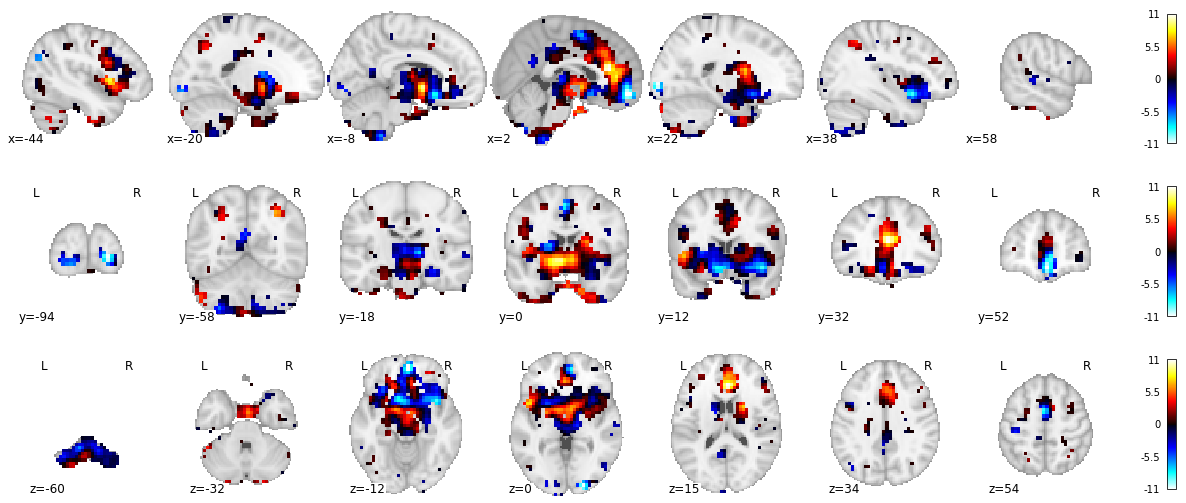

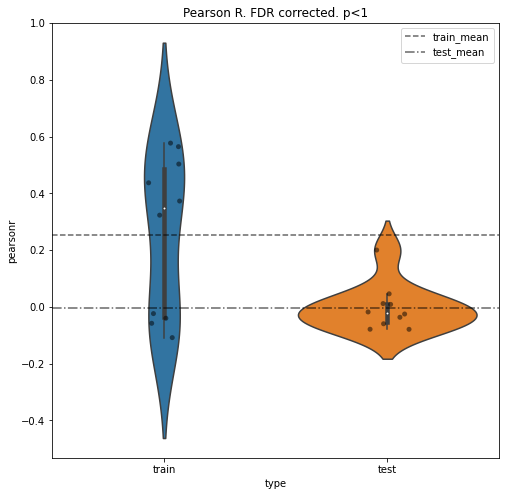

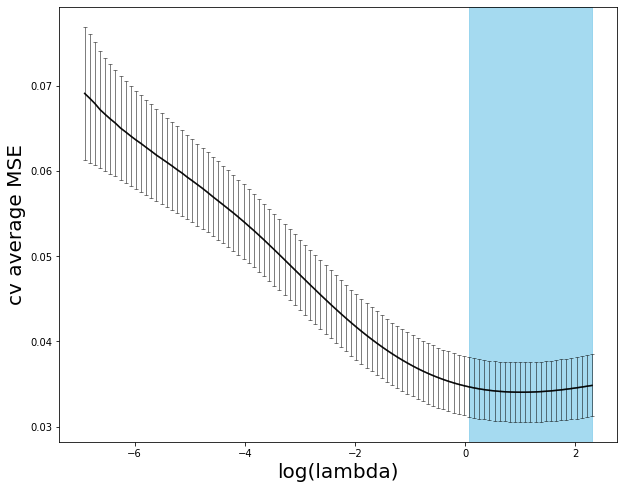

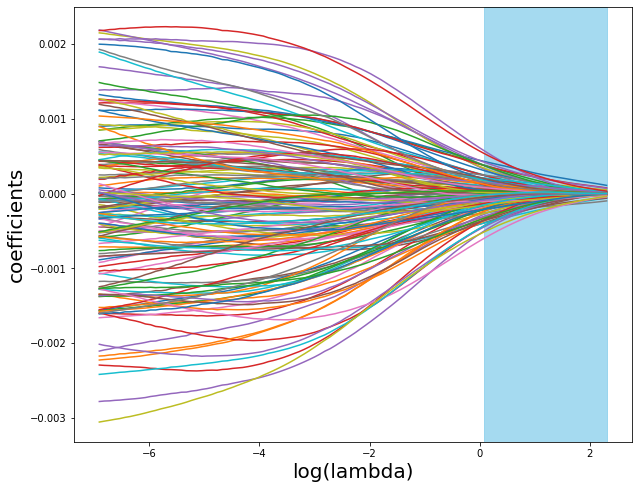

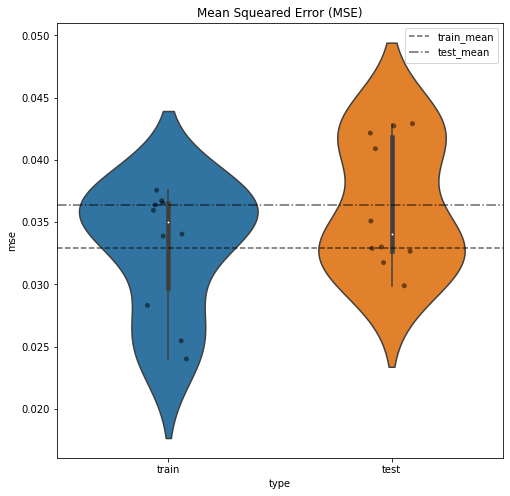

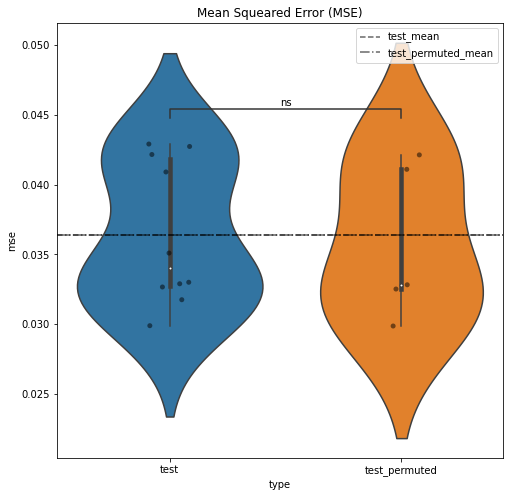

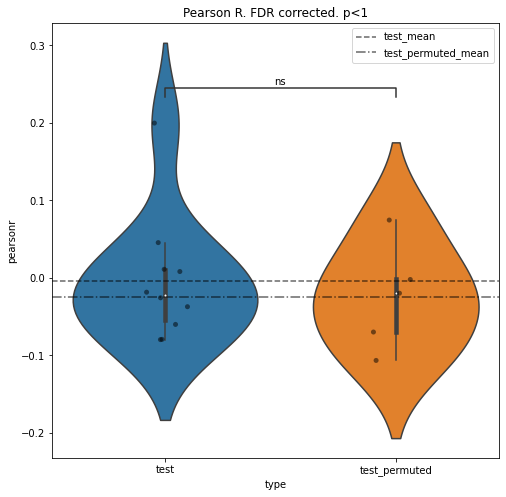

INFO: report(s)-['brainmap', 'pearsonr', 'elasticnet', 'mse', 'permutationtest'] is(are) done.
INFO: running done.


In [9]:
from mbfmri.core.engine import run_mbmvpa

_ = run_mbmvpa(bids_layout=bids_layout,            # data
               mvpa_model='elasticnet',            # MVPA model
               dm_model='prl_fictitious_rp_woa',   # computational model
               feature_name='zoom2',               # indentifier for processed fMRI data
               task_name='prl',                    # identifier for task
               process_name='PEchosen',            # identifier for target latent process
               method='5-fold',                    # type of cross-validation
               report_path=report_path,            # save path for reporting results
               n_core=4,                           # number of core for multi-processing in hBayesDM
               n_thread=4,                         # number of thread for multi-threading in generating voxel features
               use_duration=False,
               n_repeat=10,
               overwrite=True,
               pval_threshold=1,
              )